In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import pylab as pl
import matplotlib
import matplotlib.pyplot as plt

dfTrain = pd.read_csv('ml_case_training_data.csv')
dfTrainHist = pd.read_csv('ml_case_training_hist_data.csv')
dfTrainOutput = pd.read_csv('ml_case_training_output.csv')

dfTest = pd.read_csv('ml_case_test_data.csv')
dfTestHist = pd.read_csv('ml_case_test_hist_data.csv')
dfTestOutput = pd.read_csv('ml_case_test_output_template.csv')

#Create Histogram
dfTrain['cons_12m'].hist()
pl.title('Histogram of cons12m')
pl.xlabel('cons12m')
pl.ylabel('Frequency')
pl.show()

# Inner Joint dfTrainOutput with dfTrain to Append Churned Flag 
dfTrain1 = pd.merge(dfTrain, dfTrainOutput, on='id', how='inner')

#Join dfTrainHist with dfTrain1 to Append pricing history 
dfTrain2 = pd.merge(dfTrain1, dfTrainHist, on='id', how='inner')
                                   
# Create a set of dummy variables from the sex variable
df_hasgas = pd.get_dummies(dfTrain2['has_gas'])
# Join the dummy variables to the main dataframe
dfTrain2 = pd.concat([dfTrain2, df_hasgas], axis=1)                                    

# Convert date to numeric 
dfTrain2['date_activ'] = pd.to_numeric(dfTrain2.date_activ.str.replace('-',''))
dfTrain2['date_end'] = pd.to_numeric(dfTrain2.date_end.str.replace('-',''))
dfTrain2['date_first_activ'] = pd.to_numeric(dfTrain2.date_first_activ.str.replace('-',''))
dfTrain2['date_modif_prod'] = pd.to_numeric(dfTrain2.date_modif_prod.str.replace('-',''))
dfTrain2['date_renewal'] = pd.to_numeric(dfTrain2.date_renewal.str.replace('-',''))
dfTrain2['price_date'] = pd.to_numeric(dfTrain2.price_date.str.replace('-',''))

# Create a binary variable to indicate missing values
dfTrain2['Flag_Miss'] = np.where(dfTrain2['date_first_activ'] > 0, 0, 1)

# Drops numeric columns with large % of missing value
dfTrain3 = dfTrain2.drop(['campaign_disc_ele','date_first_activ','forecast_base_bill_ele','forecast_base_bill_year','forecast_bill_12m','forecast_cons','t'], axis=1)

<Figure size 640x480 with 1 Axes>

In [297]:
dfTrainOutput = pd.read_csv('ml_case_training_output.csv')
print(dfTrainOutput.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16096 entries, 0 to 16095
Data columns (total 2 columns):
id       16096 non-null object
churn    16096 non-null int64
dtypes: int64(1), object(1)
memory usage: 251.6+ KB
None


In [3]:
dfTrain3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193002 entries, 0 to 193001
Data columns (total 36 columns):
id                          193002 non-null object
activity_new                78570 non-null object
channel_sales               142407 non-null object
cons_12m                    193002 non-null int64
cons_gas_12m                193002 non-null int64
cons_last_month             193002 non-null int64
date_activ                  193002 non-null int64
date_end                    192981 non-null float64
date_modif_prod             191127 non-null float64
date_renewal                192525 non-null float64
forecast_cons_12m           193002 non-null float64
forecast_cons_year          193002 non-null int64
forecast_discount_energy    191495 non-null float64
forecast_meter_rent_12m     193002 non-null float64
forecast_price_energy_p1    191495 non-null float64
forecast_price_energy_p2    191495 non-null float64
forecast_price_pow_p1       191495 non-null float64
has_gas            

In [4]:
dfTrain3.groupby('channel_sales')['churn'].mean()

channel_sales
epumfxlbckeskwekxbiuasklxalciiuu    0.000000
ewpakwlliwisiwduibdlfmalxowmwpci    0.084836
fixdbufsefwooaasfcxdxadsiekoceaa    0.000000
foosdfpfkusacimwkcsosbicdxkicaua    0.124856
lmkebamcaaclubfxadlmueccxoimlema    0.055911
sddiedcslfslkckwlfkdpoeeailfpeds    0.000000
usilxuppasemubllopkaafesmlibmsdf    0.103847
Name: churn, dtype: float64

In [6]:
# Create a set of dummy variables from the channel_sales variable
channel_sales = pd.get_dummies(dfTrain3['channel_sales'],prefix='chs_', drop_first=True)
channel_sales.head()

,chs__ewpakwlliwisiwduibdlfmalxowmwpci,chs__fixdbufsefwooaasfcxdxadsiekoceaa,chs__foosdfpfkusacimwkcsosbicdxkicaua,chs__lmkebamcaaclubfxadlmueccxoimlema,chs__sddiedcslfslkckwlfkdpoeeailfpeds,chs__usilxuppasemubllopkaafesmlibmsdf
0,0,0,0,1,0,0
1,0,0,0,1,0,0
2,0,0,0,1,0,0
3,0,0,0,1,0,0
4,0,0,0,1,0,0


In [7]:
channel_sales.mean()

chs__ewpakwlliwisiwduibdlfmalxowmwpci    0.060036
chs__fixdbufsefwooaasfcxdxadsiekoceaa    0.000124
chs__foosdfpfkusacimwkcsosbicdxkicaua    0.458182
chs__lmkebamcaaclubfxadlmueccxoimlema    0.128812
chs__sddiedcslfslkckwlfkdpoeeailfpeds    0.000741
chs__usilxuppasemubllopkaafesmlibmsdf    0.089709
dtype: float64

In [8]:
# Join the dummy variables to the main dataframe
dfTrain3 = pd.concat([dfTrain3, channel_sales], axis=1) 

In [10]:
print( dfTrain3[['churn','chs__ewpakwlliwisiwduibdlfmalxowmwpci','chs__fixdbufsefwooaasfcxdxadsiekoceaa','chs__foosdfpfkusacimwkcsosbicdxkicaua','chs__lmkebamcaaclubfxadlmueccxoimlema','chs__sddiedcslfslkckwlfkdpoeeailfpeds','chs__usilxuppasemubllopkaafesmlibmsdf']].corr())

                                          churn  \
churn                                  1.000000   
chs__ewpakwlliwisiwduibdlfmalxowmwpci -0.011992   
chs__fixdbufsefwooaasfcxdxadsiekoceaa -0.003697   
chs__foosdfpfkusacimwkcsosbicdxkicaua  0.079578   
chs__lmkebamcaaclubfxadlmueccxoimlema -0.055486   
chs__sddiedcslfslkckwlfkdpoeeailfpeds -0.009027   
chs__usilxuppasemubllopkaafesmlibmsdf  0.005084   

                                       chs__ewpakwlliwisiwduibdlfmalxowmwpci  \
churn                                                              -0.011992   
chs__ewpakwlliwisiwduibdlfmalxowmwpci                               1.000000   
chs__fixdbufsefwooaasfcxdxadsiekoceaa                              -0.002818   
chs__foosdfpfkusacimwkcsosbicdxkicaua                              -0.232403   
chs__lmkebamcaaclubfxadlmueccxoimlema                              -0.097179   
chs__sddiedcslfslkckwlfkdpoeeailfpeds                              -0.006882   
chs__usilxuppasemubllopkaafesml

In [11]:
dfTrain3 = dfTrain3.drop(['channel_sales'], axis=1)

In [12]:
dfTrain3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193002 entries, 0 to 193001
Data columns (total 41 columns):
id                                       193002 non-null object
activity_new                             78570 non-null object
cons_12m                                 193002 non-null int64
cons_gas_12m                             193002 non-null int64
cons_last_month                          193002 non-null int64
date_activ                               193002 non-null int64
date_end                                 192981 non-null float64
date_modif_prod                          191127 non-null float64
date_renewal                             192525 non-null float64
forecast_cons_12m                        193002 non-null float64
forecast_cons_year                       193002 non-null int64
forecast_discount_energy                 191495 non-null float64
forecast_meter_rent_12m                  193002 non-null float64
forecast_price_energy_p1                 191495 non-null 

In [13]:
dfTrain3['activity_new'].unique()

array(['esoiiifxdlbkcsluxmfuacbdckommixw', nan,
       'sfisfxfcocfpcmckuekokxuseixdaoeu',
       'sscfoipxikopfskekuobeuxkxmwsuucb',
       'cssldxpacdmuuaulamxdekcokibauube',
       'ppcxfxbffsxaakxamcdpexdoxulfwwae',
       'kkklcdamwfafdcfwofuscwfwadblfmce',
       'apdekpcbwosbxepsfxclislboipuxpop',
       'xwkaesbkfsacseixxksofpddwfkbobki',
       'lckfspcixfmlwudlisbaiacuioicciam',
       'daobdssbkieoukwxbopxiiospudkopwl',
       'cccpsslxcemdlomsaffxsecccbxpdkax',
       'kwuslieomapmswolewpobpplkaooaaew',
       'ifppdlcfssupdcsdcclkoubulccouwml',
       'mwmuuaeloxbawummwfwcmxckmsfibpwk',
       'almlfkoedpwfdmmsebsdwueskducuiok',
       'wlxfbefauebfbauopppswxppaafdkoap',
       'cwkwaxadbfukekuspislmbipbkxdudla',
       'cluecxlameloamldmasudocsbmaoamdw',
       'pmccdfmdxpmdeodsasdeboedildifmlp',
       'paoauaefwcbedmiowwmokakuisslckbd',
       'bapcuxcousodpaabofsesslupodaapcx',
       'dupxuibdflmskeieweeofcaluuuiioix',
       'fmwdwsxillemwbbwelxsampiuwwpcdcb',
      

In [33]:
dfTrain3['origin_up'].unique()

array(['ldkssxwpmemidmecebumciepifcamkci',
       'lxidpiddsbxsbosboudacockeimpuepw',
       'kamkkxfxxuwbdslkwifmmcsiusiuosws', nan,
       'usapbepcfoloekilkwsdiboslwaxobdp',
       'ewxeelcelemmiwuafmddpobolfuxioce'], dtype=object)

In [34]:
dfTrain3.groupby('origin_up')['churn'].mean()

origin_up
ewxeelcelemmiwuafmddpobolfuxioce    0.000000
kamkkxfxxuwbdslkwifmmcsiusiuosws    0.058641
ldkssxwpmemidmecebumciepifcamkci    0.085884
lxidpiddsbxsbosboudacockeimpuepw    0.128971
usapbepcfoloekilkwsdiboslwaxobdp    0.000000
Name: churn, dtype: float64

In [14]:
dfTrain4 = dfTrain3.drop(['activity_new'], axis=1)

In [32]:
dfTrain4 = dfTrain3.drop(['has_gas'], axis=1)

In [15]:
dfTrain4.isnull().sum()

id                                          0
cons_12m                                    0
cons_gas_12m                                0
cons_last_month                             0
date_activ                                  0
date_end                                   21
date_modif_prod                          1875
date_renewal                              477
forecast_cons_12m                           0
forecast_cons_year                          0
forecast_discount_energy                 1507
forecast_meter_rent_12m                     0
forecast_price_energy_p1                 1507
forecast_price_energy_p2                 1507
forecast_price_pow_p1                    1507
has_gas                                     0
imp_cons                                    0
margin_gross_pow_ele                      156
margin_net_pow_ele                        156
nb_prod_act                                 0
net_margin                                180
num_years_antig                   

In [17]:
dfTrain4 = dfTrain4.dropna()
dfTrain4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186710 entries, 0 to 193001
Data columns (total 40 columns):
id                                       186710 non-null object
cons_12m                                 186710 non-null int64
cons_gas_12m                             186710 non-null int64
cons_last_month                          186710 non-null int64
date_activ                               186710 non-null int64
date_end                                 186710 non-null float64
date_modif_prod                          186710 non-null float64
date_renewal                             186710 non-null float64
forecast_cons_12m                        186710 non-null float64
forecast_cons_year                       186710 non-null int64
forecast_discount_energy                 186710 non-null float64
forecast_meter_rent_12m                  186710 non-null float64
forecast_price_energy_p1                 186710 non-null float64
forecast_price_energy_p2                 186710 non-nul

In [19]:
# Rename the self-defined Churn coloumn name to churn_def 
dfTrain4.rename(columns={'chs__ewpakwlliwisiwduibdlfmalxowmwpci': 'chs_ew'}, inplace=True)
dfTrain4.rename(columns={'chs__fixdbufsefwooaasfcxdxadsiekoceaa': 'chs_fi'}, inplace=True)
dfTrain4.rename(columns={'chs__foosdfpfkusacimwkcsosbicdxkicaua': 'chs_fo'}, inplace=True)
dfTrain4.rename(columns={'chs__lmkebamcaaclubfxadlmueccxoimlema': 'chs_lm'}, inplace=True)
dfTrain4.rename(columns={'chs__sddiedcslfslkckwlfkdpoeeailfpeds': 'chs_sd'}, inplace=True)
dfTrain4.rename(columns={'chs__usilxuppasemubllopkaafesmlibmsdf': 'chs_uf'}, inplace=True)
print dfTrain4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186710 entries, 0 to 193001
Data columns (total 40 columns):
id                          186710 non-null object
cons_12m                    186710 non-null int64
cons_gas_12m                186710 non-null int64
cons_last_month             186710 non-null int64
date_activ                  186710 non-null int64
date_end                    186710 non-null float64
date_modif_prod             186710 non-null float64
date_renewal                186710 non-null float64
forecast_cons_12m           186710 non-null float64
forecast_cons_year          186710 non-null int64
forecast_discount_energy    186710 non-null float64
forecast_meter_rent_12m     186710 non-null float64
forecast_price_energy_p1    186710 non-null float64
forecast_price_energy_p2    186710 non-null float64
forecast_price_pow_p1       186710 non-null float64
has_gas                     186710 non-null object
imp_cons                    186710 non-null float64
margin_gross_pow_

In [35]:
# Create a set of dummy variables from the channel_sales variable
origin_up = pd.get_dummies(dfTrain3['origin_up'],prefix='orig_', drop_first=True)
origin_up.head()

,orig__kamkkxfxxuwbdslkwifmmcsiusiuosws,orig__ldkssxwpmemidmecebumciepifcamkci,orig__lxidpiddsbxsbosboudacockeimpuepw,orig__usapbepcfoloekilkwsdiboslwaxobdp
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


In [36]:
# Join the dummy variables to the main dataframe
dfTrain3 = pd.concat([dfTrain3, origin_up], axis=1) 
dfTrain3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193002 entries, 0 to 193001
Data columns (total 45 columns):
id                                        193002 non-null object
activity_new                              78570 non-null object
cons_12m                                  193002 non-null int64
cons_gas_12m                              193002 non-null int64
cons_last_month                           193002 non-null int64
date_activ                                193002 non-null int64
date_end                                  192981 non-null float64
date_modif_prod                           191127 non-null float64
date_renewal                              192525 non-null float64
forecast_cons_12m                         193002 non-null float64
forecast_cons_year                        193002 non-null int64
forecast_discount_energy                  191495 non-null float64
forecast_meter_rent_12m                   193002 non-null float64
forecast_price_energy_p1                  19

In [37]:
dfTrain4 = dfTrain3.drop(['activity_new','has_gas','origin_up'], axis=1)

In [38]:
# Rename the self-defined Churn coloumn name to churn_def 
dfTrain4.rename(columns={'chs__ewpakwlliwisiwduibdlfmalxowmwpci': 'chs_ew'}, inplace=True)
dfTrain4.rename(columns={'chs__fixdbufsefwooaasfcxdxadsiekoceaa': 'chs_fi'}, inplace=True)
dfTrain4.rename(columns={'chs__foosdfpfkusacimwkcsosbicdxkicaua': 'chs_fo'}, inplace=True)
dfTrain4.rename(columns={'chs__lmkebamcaaclubfxadlmueccxoimlema': 'chs_lm'}, inplace=True)
dfTrain4.rename(columns={'chs__sddiedcslfslkckwlfkdpoeeailfpeds': 'chs_sd'}, inplace=True)
dfTrain4.rename(columns={'chs__usilxuppasemubllopkaafesmlibmsdf': 'chs_uf'}, inplace=True)

dfTrain4.rename(columns={'orig__kamkkxfxxuwbdslkwifmmcsiusiuosws': 'orig_ka'}, inplace=True)
dfTrain4.rename(columns={'orig__ldkssxwpmemidmecebumciepifcamkci': 'orig_ld'}, inplace=True)
dfTrain4.rename(columns={'orig__lxidpiddsbxsbosboudacockeimpuepw': 'orig_lx'}, inplace=True)
dfTrain4.rename(columns={'orig__usapbepcfoloekilkwsdiboslwaxobdp': 'orig_us'}, inplace=True)

print dfTrain4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193002 entries, 0 to 193001
Data columns (total 42 columns):
id                          193002 non-null object
cons_12m                    193002 non-null int64
cons_gas_12m                193002 non-null int64
cons_last_month             193002 non-null int64
date_activ                  193002 non-null int64
date_end                    192981 non-null float64
date_modif_prod             191127 non-null float64
date_renewal                192525 non-null float64
forecast_cons_12m           193002 non-null float64
forecast_cons_year          193002 non-null int64
forecast_discount_energy    191495 non-null float64
forecast_meter_rent_12m     193002 non-null float64
forecast_price_energy_p1    191495 non-null float64
forecast_price_energy_p2    191495 non-null float64
forecast_price_pow_p1       191495 non-null float64
imp_cons                    193002 non-null float64
margin_gross_pow_ele        192846 non-null float64
margin_net_pow_e

In [42]:
dfTrain4 = dfTrain4.dropna()
dfTrain4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 187748 entries, 0 to 193001
Data columns (total 42 columns):
id                          187748 non-null object
cons_12m                    187748 non-null int64
cons_gas_12m                187748 non-null int64
cons_last_month             187748 non-null int64
date_activ                  187748 non-null int64
date_end                    187748 non-null float64
date_modif_prod             187748 non-null float64
date_renewal                187748 non-null float64
forecast_cons_12m           187748 non-null float64
forecast_cons_year          187748 non-null int64
forecast_discount_energy    187748 non-null float64
forecast_meter_rent_12m     187748 non-null float64
forecast_price_energy_p1    187748 non-null float64
forecast_price_energy_p2    187748 non-null float64
forecast_price_pow_p1       187748 non-null float64
imp_cons                    187748 non-null float64
margin_gross_pow_ele        187748 non-null float64
margin_net_pow_e

In [43]:
print(dfTrain4.shape)

(187748, 42)


In [41]:
dfTrain4.corr()

,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,...,chs_ew,chs_fi,chs_fo,chs_lm,chs_sd,chs_uf,orig_ka,orig_ld,orig_lx,orig_us
cons_12m,1.000000e+00,0.471080,0.919537,0.013547,-0.015928,-0.071952,0.000275,0.165239,0.139542,-0.043723,...,-0.055487,0.017386,-0.094471,0.287177,-0.006680,-0.080574,0.080346,-0.025624,-0.049925,-0.002169
cons_gas_12m,4.710801e-01,1.000000,0.447124,0.014614,0.014651,-0.030862,0.016914,0.059619,0.057659,-0.014938,...,-0.028590,0.012924,-0.028628,0.094677,-0.003188,-0.041352,0.035950,-0.022651,-0.013795,-0.002004
cons_last_month,9.195370e-01,0.447124,1.000000,0.014655,-0.010450,-0.065159,0.003822,0.129634,0.151483,-0.037787,...,-0.047071,0.018551,-0.079404,0.245690,-0.005360,-0.067508,0.065447,-0.017327,-0.043423,-0.000595
date_activ,1.354695e-02,0.014614,0.014655,1.000000,0.027874,0.443995,-0.008389,-0.056887,-0.057246,0.078316,...,0.136856,0.016006,0.356337,-0.013662,0.039010,0.173355,-0.189512,-0.275965,0.401452,0.009583
date_end,-1.592784e-02,0.014651,-0.010450,0.027874,1.000000,0.074142,0.772162,-0.011159,-0.006163,-0.015478,...,-0.005153,-0.002891,-0.003437,-0.022487,-0.007885,0.005072,0.021134,-0.024609,0.001635,-0.000597
date_modif_prod,-7.195158e-02,-0.030862,-0.065159,0.443995,0.074142,1.000000,-0.035693,-0.051340,-0.054936,0.187260,...,0.055860,NaN,0.207240,-0.108140,0.017436,0.122603,-0.124949,-0.142292,0.228794,0.000575
date_renewal,2.745514e-04,0.016914,0.003822,-0.008389,0.772162,-0.035693,1.000000,-0.030624,-0.010540,-0.187096,...,-0.018549,-0.001727,-0.020517,-0.012549,-0.012344,-0.010945,0.015903,-0.002015,-0.012463,0.000193
forecast_cons_12m,1.652389e-01,0.059619,0.129634,-0.056887,-0.011159,-0.051340,-0.030624,1.000000,0.746166,0.014979,...,-0.030281,-0.001177,-0.001124,0.080333,0.005058,-0.069313,-0.086616,0.064162,0.021909,-0.003515
forecast_cons_year,1.395419e-01,0.057659,0.151483,-0.057246,-0.006163,-0.054936,-0.010540,0.746166,1.000000,-0.008990,...,-0.028147,0.004484,-0.015799,0.070344,0.006982,-0.057785,-0.058720,0.062669,-0.002259,-0.000644
forecast_discount_energy,-4.372325e-02,-0.014938,-0.037787,0.078316,-0.015478,0.187260,-0.187096,0.014979,-0.008990,1.000000,...,0.000108,-0.002151,0.050265,-0.047920,-0.005253,0.035180,-0.053635,-0.032074,0.074162,-0.002151


In [46]:
y = dfTrain4.ix[:,22].values

/Users/meichen/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [47]:
X = dfTrain4.ix[:,(1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41)].values

/Users/meichen/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [48]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn

from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)

In [49]:
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [52]:
y_pred = LogReg.predict(X_test)

In [53]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[50769,     0],
       [ 5556,     0]])

In [54]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.90      1.00      0.95     50769
          1       0.00      0.00      0.00      5556

avg / total       0.81      0.90      0.85     56325



/Users/meichen/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [57]:
dfTrain5 = dfTrain4.drop(['churn'], axis=1)

train_cols = dfTrain5.columns[1:]
print dfTrain5.columns[1:]

Index([u'cons_12m', u'cons_gas_12m', u'cons_last_month', u'date_activ',
       u'date_end', u'date_modif_prod', u'date_renewal', u'forecast_cons_12m',
       u'forecast_cons_year', u'forecast_discount_energy',
       u'forecast_meter_rent_12m', u'forecast_price_energy_p1',
       u'forecast_price_energy_p2', u'forecast_price_pow_p1', u'imp_cons',
       u'margin_gross_pow_ele', u'margin_net_pow_ele', u'nb_prod_act',
       u'net_margin', u'num_years_antig', u'pow_max', u'price_date',
       u'price_p1_var', u'price_p2_var', u'price_p3_var', u'price_p1_fix',
       u'price_p2_fix', u'price_p3_fix', u'f', u'Flag_Miss', u'chs_ew',
       u'chs_fi', u'chs_fo', u'chs_lm', u'chs_sd', u'chs_uf', u'orig_ka',
       u'orig_ld', u'orig_lx', u'orig_us'],
      dtype='object')


In [59]:
import statsmodels.api as sm       #for statistical modeling

#Logistic Regression
#logit = sm.Logit(dfTrain4['churn'], dfTrain4[train_cols])

# fit the model
#result = logit.fit()
#print result.summary()

,churn,Flag_Miss,price_date
churn,1.000000,-0.088914,-0.000096
Flag_Miss,-0.088914,1.000000,0.000253
price_date,-0.000096,0.000253,1.000000


In [61]:
dfTrain4[['churn','cons_12m', 'cons_gas_12m', 'cons_last_month', 'date_activ',
       'date_end', 'date_modif_prod', 'date_renewal', 'forecast_cons_12m',
       'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_p1',
       'forecast_price_energy_p2', 'forecast_price_pow_p1', 'imp_cons',
       'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'pow_max', 'price_date',
       'price_p1_var', 'price_p2_var', 'price_p3_var', 'price_p1_fix',
       'price_p2_fix', 'price_p3_fix', 'f', 'Flag_Miss', 'chs_ew',
       'chs_fi', 'chs_fo', 'chs_lm', 'chs_sd', 'chs_uf', 'orig_ka',
       'orig_ld', 'orig_lx', 'orig_us']].corr()

,churn,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,...,chs_ew,chs_fi,chs_fo,chs_lm,chs_sd,chs_uf,orig_ka,orig_ld,orig_lx,orig_us
churn,1.000000,-0.049612,-0.041309,-0.044494,0.070469,0.010634,0.051054,0.009890,0.008972,0.004868,...,-0.011631,NaN,0.076497,-0.053525,-0.008201,0.005405,-0.080701,-0.023491,0.094188,-0.003540
cons_12m,-0.049612,1.000000,0.492161,0.921642,0.009660,-0.022386,-0.073169,-0.003886,0.166507,0.137995,...,-0.056020,NaN,-0.101001,0.294169,-0.006641,-0.080091,0.082484,-0.022392,-0.054933,-0.002140
cons_gas_12m,-0.041309,0.492161,1.000000,0.466618,0.016265,0.016356,-0.032528,0.017585,0.060339,0.059880,...,-0.029490,NaN,-0.031655,0.101475,-0.004570,-0.042497,0.036295,-0.021738,-0.015091,-0.001973
cons_last_month,-0.044494,0.921642,0.466618,1.000000,0.010812,-0.013456,-0.065048,0.002171,0.130730,0.150718,...,-0.047396,NaN,-0.084913,0.249663,-0.005447,-0.067023,0.068439,-0.015358,-0.048051,-0.000701
date_activ,0.070469,0.009660,0.016265,0.010812,1.000000,0.025290,0.447078,-0.004723,-0.055826,-0.055053,...,0.140767,NaN,0.350273,-0.010219,0.036514,0.177503,-0.183530,-0.279511,0.399803,0.010074
date_end,0.010634,-0.022386,0.016356,-0.013456,0.025290,1.000000,0.080917,0.775149,-0.016674,-0.010382,...,-0.007634,NaN,-0.003218,-0.028808,-0.007735,0.005665,0.016448,-0.026032,0.007022,-0.000681
date_modif_prod,0.051054,-0.073169,-0.032528,-0.065048,0.447078,0.080917,1.000000,-0.036323,-0.054214,-0.056836,...,0.055377,NaN,0.208028,-0.108561,0.017631,0.123568,-0.124755,-0.143479,0.229816,0.001190
date_renewal,0.009890,-0.003886,0.017585,0.002171,-0.004723,0.775149,-0.036323,1.000000,-0.034826,-0.013373,...,-0.018576,NaN,-0.017793,-0.016131,-0.012899,-0.009939,0.013049,-0.001482,-0.010385,0.000160
forecast_cons_12m,0.008972,0.166507,0.060339,0.130730,-0.055826,-0.016674,-0.054214,-0.034826,1.000000,0.744246,...,-0.032870,NaN,-0.001159,0.081498,-0.003382,-0.067911,-0.087449,0.062303,0.024393,-0.003295
forecast_cons_year,0.004868,0.137995,0.059880,0.150718,-0.055053,-0.010382,-0.056836,-0.013373,0.744246,1.000000,...,-0.028673,NaN,-0.015522,0.071420,-0.002458,-0.057109,-0.058547,0.060355,-0.000380,-0.000480


In [62]:
dfTrain4.isnull().sum()

id                          0
cons_12m                    0
cons_gas_12m                0
cons_last_month             0
date_activ                  0
date_end                    0
date_modif_prod             0
date_renewal                0
forecast_cons_12m           0
forecast_cons_year          0
forecast_discount_energy    0
forecast_meter_rent_12m     0
forecast_price_energy_p1    0
forecast_price_energy_p2    0
forecast_price_pow_p1       0
imp_cons                    0
margin_gross_pow_ele        0
margin_net_pow_ele          0
nb_prod_act                 0
net_margin                  0
num_years_antig             0
pow_max                     0
churn                       0
price_date                  0
price_p1_var                0
price_p2_var                0
price_p3_var                0
price_p1_fix                0
price_p2_fix                0
price_p3_fix                0
f                           0
Flag_Miss                   0
chs_ew                      0
chs_fi    

In [65]:
dfTrain4.groupby('churn')['orig_lx','Flag_Miss','orig_ka','margin_gross_pow_ele','chs_fo'].mean()

,orig_lx,Flag_Miss,orig_ka,margin_gross_pow_ele,chs_fo
churn,,,,,
0,0.466155,0.796965,0.296691,21.802081,0.440974
1,0.625462,0.673320,0.173402,28.048331,0.569885


In [69]:
#Logistic Regression
logit = sm.Logit(dfTrain4['churn'], dfTrain4['orig_lx'])

# fit the model
result = logit.fit()
print result.summary()

Optimization terminated successfully.
         Current function value: 0.541241
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  churn   No. Observations:               187748
Model:                          Logit   Df Residuals:                   187747
Method:                           MLE   Df Model:                            0
Date:                Sun, 18 Nov 2018   Pseudo R-squ.:                 -0.7044
Time:                        00:05:03   Log-Likelihood:            -1.0162e+05
converged:                       True   LL-Null:                       -59620.
                                        LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
orig_lx       -1.9416      0.010   -193.386      0.000      -1.961      -1.922


In [73]:
dfTrain4[['churn','orig_lx',
'Flag_Miss',
'orig_ka',
'margin_gross_pow_ele',
'chs_fo',
'date_activ',
'num_years_antig',
'margin_net_pow_ele',
'chs_lm',
'date_modif_prod',
'cons_12m',
'cons_last_month',
'price_p3_fix',
'price_p3_var',
'cons_gas_12m',
'price_p2_fix',
'forecast_meter_rent_12m',
'f'
]].corr()

,churn,orig_lx,Flag_Miss,orig_ka,margin_gross_pow_ele,chs_fo,date_activ,num_years_antig,margin_net_pow_ele,chs_lm,date_modif_prod,cons_12m,cons_last_month,price_p3_fix,price_p3_var,cons_gas_12m,price_p2_fix,forecast_meter_rent_12m,f
churn,1.000000,0.094188,-0.088914,-0.080701,0.077817,0.076497,0.070469,-0.068675,0.060424,-0.053525,0.051054,-0.049612,-0.044494,0.042594,0.041589,-0.041309,0.037384,0.035795,0.032192
orig_lx,0.094188,1.000000,-0.521665,-0.608132,0.083085,0.529262,0.399803,-0.386226,0.048856,-0.228844,0.229816,-0.054933,-0.048051,0.062768,0.049894,-0.015091,0.025103,0.040379,0.000837
Flag_Miss,-0.088914,-0.521665,1.000000,0.314125,-0.018320,-0.293640,-0.196854,0.187178,-0.007065,0.125535,-0.112691,-0.010508,-0.009505,-0.032487,-0.031807,-0.061500,-0.031475,-0.050512,-0.000431
orig_ka,-0.080701,-0.608132,0.314125,1.000000,0.002674,-0.312796,-0.183530,0.156912,0.018319,0.169428,-0.124755,0.082484,0.068439,-0.117345,-0.133053,0.036295,-0.143352,-0.130212,0.003514
margin_gross_pow_ele,0.077817,0.083085,-0.018320,0.002674,1.000000,0.060928,0.137211,-0.079828,0.763201,-0.043229,0.053741,-0.069728,-0.057681,0.106521,0.074544,-0.017892,0.002167,-0.017994,0.020244
chs_fo,0.076497,0.529262,-0.293640,-0.312796,0.060928,1.000000,0.350273,-0.343581,0.037447,-0.352559,0.208028,-0.101001,-0.084913,0.056614,0.044013,-0.031655,0.017237,0.015734,0.048800
date_activ,0.070469,0.399803,-0.196854,-0.183530,0.137211,0.350273,1.000000,-0.962127,0.080022,-0.010219,0.447078,0.009660,0.010812,-0.060777,-0.076961,0.016265,-0.112302,-0.100809,0.009824
num_years_antig,-0.068675,-0.386226,0.187178,0.156912,-0.079828,-0.343581,-0.962127,1.000000,-0.035284,0.026696,-0.467620,0.012363,0.008314,0.068195,0.084719,-0.009207,0.120884,0.109022,-0.013683
margin_net_pow_ele,0.060424,0.048856,-0.007065,0.018319,0.763201,0.037447,0.080022,-0.035284,1.000000,-0.022852,0.014816,-0.049096,-0.040524,0.114925,0.088368,-0.008891,0.027186,0.002041,0.010177
chs_lm,-0.053525,-0.228844,0.125535,0.169428,-0.043229,-0.352559,-0.010219,0.026696,-0.022852,1.000000,-0.108561,0.294169,0.249663,0.015012,0.011909,0.101475,0.014235,0.022433,-0.039452


In [74]:
dfTrain4[['churn',
'Flag_Miss',
'orig_ka',
'margin_gross_pow_ele',
'chs_fo',
'date_activ',
'num_years_antig',
'chs_lm',
'date_modif_prod',
'cons_12m',
'price_p3_fix',
'cons_gas_12m',
'f',
'net_margin',
'price_p2_var',
'forecast_price_energy_p2',
'orig_ld',
'nb_prod_act']].corr()

,churn,Flag_Miss,orig_ka,margin_gross_pow_ele,chs_fo,date_activ,num_years_antig,chs_lm,date_modif_prod,cons_12m,price_p3_fix,cons_gas_12m,f,net_margin,price_p2_var,forecast_price_energy_p2,orig_ld,nb_prod_act
churn,1.000000,-0.088914,-0.080701,0.077817,0.076497,0.070469,-0.068675,-0.053525,0.051054,-0.049612,0.042594,-0.041309,0.032192,0.029839,0.027275,0.026958,-0.023491,-0.023098
Flag_Miss,-0.088914,1.000000,0.314125,-0.018320,-0.293640,-0.196854,0.187178,0.125535,-0.112691,-0.010508,-0.032487,-0.061500,-0.000431,-0.027310,0.018661,0.019534,0.284364,0.021359
orig_ka,-0.080701,0.314125,1.000000,0.002674,-0.312796,-0.183530,0.156912,0.169428,-0.124755,0.082484,-0.117345,0.036295,0.003514,-0.090537,-0.026088,-0.022316,-0.342887,0.007391
margin_gross_pow_ele,0.077817,-0.018320,0.002674,1.000000,0.060928,0.137211,-0.079828,-0.043229,0.053741,-0.069728,0.106521,-0.017892,0.020244,-0.104385,0.053741,0.061980,-0.103003,-0.045226
chs_fo,0.076497,-0.293640,-0.312796,0.060928,1.000000,0.350273,-0.343581,-0.352559,0.208028,-0.101001,0.056614,-0.031655,0.048800,0.017286,-0.026096,-0.028596,-0.293023,-0.040378
date_activ,0.070469,-0.196854,-0.183530,0.137211,0.350273,1.000000,-0.962127,-0.010219,0.447078,0.009660,-0.060777,0.016265,0.009824,-0.028186,-0.096493,-0.095155,-0.279511,-0.001634
num_years_antig,-0.068675,0.187178,0.156912,-0.079828,-0.343581,-0.962127,1.000000,0.026696,-0.467620,0.012363,0.068195,-0.009207,-0.013683,0.035665,0.104158,0.103289,0.292517,0.010165
chs_lm,-0.053525,0.125535,0.169428,-0.043229,-0.352559,-0.010219,0.026696,1.000000,-0.108561,0.294169,0.015012,0.101475,-0.039452,0.065991,0.092675,0.093747,0.089263,0.078605
date_modif_prod,0.051054,-0.112691,-0.124755,0.053741,0.208028,0.447078,-0.467620,-0.108561,1.000000,-0.073169,0.001116,-0.032528,0.003201,-0.042179,-0.050395,-0.050716,-0.143479,0.030411
cons_12m,-0.049612,-0.010508,0.082484,-0.069728,-0.101001,0.009660,0.012363,0.294169,-0.073169,1.000000,0.068162,0.492161,-0.232110,0.124805,0.142688,0.144470,-0.022392,0.316409


In [76]:
cols_to_keep = ['Flag_Miss',
'orig_ka',
'margin_gross_pow_ele',
'chs_fo',
'date_activ',
'chs_lm',
'date_modif_prod',
'cons_12m',
'cons_gas_12m',
'f',
'net_margin',
'price_p2_var',
'orig_ld',
'nb_prod_act']
data = dfTrain4[cols_to_keep]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 187748 entries, 0 to 193001
Data columns (total 14 columns):
Flag_Miss               187748 non-null int64
orig_ka                 187748 non-null uint8
margin_gross_pow_ele    187748 non-null float64
chs_fo                  187748 non-null uint8
date_activ              187748 non-null int64
chs_lm                  187748 non-null uint8
date_modif_prod         187748 non-null float64
cons_12m                187748 non-null int64
cons_gas_12m            187748 non-null int64
f                       187748 non-null uint8
net_margin              187748 non-null float64
price_p2_var            187748 non-null float64
orig_ld                 187748 non-null uint8
nb_prod_act             187748 non-null int64
dtypes: float64(4), int64(5), uint8(5)
memory usage: 15.2 MB


In [77]:
train_cols = data.columns[1:]
print data.columns[1:]

Index([u'orig_ka', u'margin_gross_pow_ele', u'chs_fo', u'date_activ',
       u'chs_lm', u'date_modif_prod', u'cons_12m', u'cons_gas_12m', u'f',
       u'net_margin', u'price_p2_var', u'orig_ld', u'nb_prod_act'],
      dtype='object')


In [78]:
#Logistic Regression
logit = sm.Logit(dfTrain4['churn'], data[train_cols])
# fit the model
result = logit.fit()
print result.summary()

Optimization terminated successfully.
         Current function value: 0.307206
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  churn   No. Observations:               187748
Model:                          Logit   Df Residuals:                   187735
Method:                           MLE   Df Model:                           12
Date:                Sun, 18 Nov 2018   Pseudo R-squ.:                 0.03259
Time:                        09:19:59   Log-Likelihood:                -57677.
converged:                       True   LL-Null:                       -59620.
                                        LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
orig_ka                 -0.6284      0.023    -27.101      0.000      -0.674      -0.583

In [80]:
c_keep = [
'churn',
'Flag_Miss',
'orig_ka',
'margin_gross_pow_ele',
'chs_fo',
'date_activ',
'chs_lm',
'date_modif_prod',
'cons_12m',
'cons_gas_12m',
'f',
'net_margin',
'price_p2_var',
'orig_ld',
'nb_prod_act']
dfTrain5 = dfTrain4[c_keep]
dfTrain5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 187748 entries, 0 to 193001
Data columns (total 15 columns):
churn                   187748 non-null int64
Flag_Miss               187748 non-null int64
orig_ka                 187748 non-null uint8
margin_gross_pow_ele    187748 non-null float64
chs_fo                  187748 non-null uint8
date_activ              187748 non-null int64
chs_lm                  187748 non-null uint8
date_modif_prod         187748 non-null float64
cons_12m                187748 non-null int64
cons_gas_12m            187748 non-null int64
f                       187748 non-null uint8
net_margin              187748 non-null float64
price_p2_var            187748 non-null float64
orig_ld                 187748 non-null uint8
nb_prod_act             187748 non-null int64
dtypes: float64(4), int64(6), uint8(5)
memory usage: 16.7 MB


In [81]:
X = dfTrain5.ix[:,(1,2,3,4,5,6,7,8,9,10,11,12,13,14)].values
y = dfTrain5.ix[:,0].values

/Users/meichen/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
/Users/meichen/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [82]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn

from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)

In [83]:
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [84]:
y_pred = LogReg.predict(X_test)

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[50769,     0],
       [ 5556,     0]])

In [85]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.90      1.00      0.95     50769
          1       0.00      0.00      0.00      5556

avg / total       0.81      0.90      0.85     56325



/Users/meichen/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [87]:
import statsmodels.api as sm

#Logistic Regression
logit = sm.Logit(dfTrain4['churn'], data[train_cols])
# fit the model
result = logit.fit()

print result.summary()

Optimization terminated successfully.
         Current function value: 0.307206
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  churn   No. Observations:               187748
Model:                          Logit   Df Residuals:                   187735
Method:                           MLE   Df Model:                           12
Date:                Sun, 18 Nov 2018   Pseudo R-squ.:                 0.03259
Time:                        09:41:53   Log-Likelihood:                -57677.
converged:                       True   LL-Null:                       -59620.
                                        LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
orig_ka                 -0.6284      0.023    -27.101      0.000      -0.674      -0.583

In [88]:
cols_keep = ['Flag_Miss',
'orig_ka',
'margin_gross_pow_ele',
'chs_fo',
'date_activ',
'chs_lm',
'cons_12m',
'cons_gas_12m',
'f',
'net_margin',
'price_p2_var',
'orig_ld',
'nb_prod_act']

In [89]:
X = dfTrain4[cols_keep]
y = dfTrain4['churn']

In [90]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.306050
         Iterations 9
                           Results: Logit
Model:               Logit             Pseudo R-squared:  0.036      
Dependent Variable:  churn             AIC:               114946.6624
Date:                2018-11-18 09:49  BIC:               115078.5195
No. Observations:    187748            Log-Likelihood:    -57460.    
Df Model:            12                LL-Null:           -59620.    
Df Residuals:        187735            LLR p-value:       0.0000     
Converged:           1.0000            Scale:             1.0000     
No. Iterations:      9.0000                                          
---------------------------------------------------------------------
                      Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------
Flag_Miss            -0.4201   0.0201 -20.9216 0.0000 -0.4595 -0.3808
orig_ka         

In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [92]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.91


In [93]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[50987     0]
 [ 5338     0]]


In [94]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.91      1.00      0.95     50987
          1       0.00      0.00      0.00      5338

avg / total       0.82      0.91      0.86     56325



/Users/meichen/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [95]:
dfTrain4['churn'].mean()

0.09660289323987473

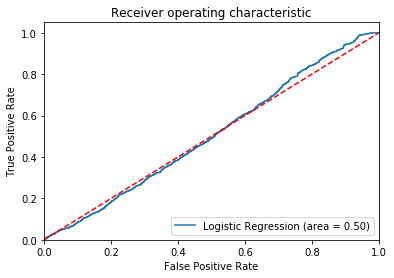

In [96]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [97]:
dfTrain4[[
'churn',
'Flag_Miss',
'orig_ka',
'margin_gross_pow_ele',
'chs_fo',
'date_activ',
'chs_lm',
'date_modif_prod',
'cons_12m',
'cons_gas_12m',
'f',
'net_margin',
'price_p2_var',
'orig_ld',
'nb_prod_act',
'date_renewal',
'forecast_cons_12m',
'chs_sd',
'price_p1_fix',
'chs_uf',
'imp_cons',
'forecast_price_pow_p1',
'forecast_cons_year',
'orig_us',
'forecast_price_energy_p1',
'price_p1_var',
'price_date']].corr()

,churn,Flag_Miss,orig_ka,margin_gross_pow_ele,chs_fo,date_activ,chs_lm,date_modif_prod,cons_12m,cons_gas_12m,...,chs_sd,price_p1_fix,chs_uf,imp_cons,forecast_price_pow_p1,forecast_cons_year,orig_us,forecast_price_energy_p1,price_p1_var,price_date
churn,1.000000,-0.088914,-0.080701,0.077817,0.076497,0.070469,-0.053525,0.051054,-0.049612,-0.041309,...,-0.008201,0.007072,0.005405,0.005251,0.004913,0.004868,-0.003540,-0.002297,0.001692,-0.000096
Flag_Miss,-0.088914,1.000000,0.314125,-0.018320,-0.293640,-0.196854,0.125535,-0.112691,-0.010508,-0.061500,...,0.013123,0.049924,-0.018982,-0.013077,0.041858,-0.016760,0.005665,0.055352,0.064946,0.000253
orig_ka,-0.080701,0.314125,1.000000,0.002674,-0.312796,-0.183530,0.169428,-0.124755,0.082484,0.036295,...,-0.010173,0.011062,0.060730,-0.054420,0.015133,-0.058547,-0.006831,0.133253,0.137870,-0.000096
margin_gross_pow_ele,0.077817,-0.018320,0.002674,1.000000,0.060928,0.137211,-0.043229,0.053741,-0.069728,-0.017892,...,0.000961,-0.127054,0.033793,-0.124544,-0.113018,-0.140514,-0.006538,0.186006,0.168008,0.000040
chs_fo,0.076497,-0.293640,-0.312796,0.060928,1.000000,0.350273,-0.352559,0.208028,-0.101001,-0.031655,...,-0.022841,-0.016622,-0.286332,-0.009631,-0.026792,-0.015522,-0.009860,0.016770,0.026631,-0.000128
date_activ,0.070469,-0.196854,-0.183530,0.137211,0.350273,1.000000,-0.010219,0.447078,0.009660,0.016265,...,0.036514,0.042759,0.177503,-0.040186,0.024624,-0.055053,0.010074,0.195757,0.203513,0.000157
chs_lm,-0.053525,0.125535,0.169428,-0.043229,-0.352559,-0.010219,1.000000,-0.108561,0.294169,0.101475,...,-0.009707,-0.001636,-0.121687,0.073845,-0.014527,0.071420,-0.004190,-0.002324,0.004057,0.000276
date_modif_prod,0.051054,-0.112691,-0.124755,0.053741,0.208028,0.447078,-0.108561,1.000000,-0.073169,-0.032528,...,0.017631,0.024489,0.123568,-0.045295,0.020811,-0.056836,0.001190,0.116989,0.125147,-0.000084
cons_12m,-0.049612,-0.010508,0.082484,-0.069728,-0.101001,0.009660,0.294169,-0.073169,1.000000,0.492161,...,-0.006641,-0.011680,-0.080091,0.138103,-0.023037,0.137995,-0.002140,-0.031114,-0.022267,-0.000169
cons_gas_12m,-0.041309,-0.061500,0.036295,-0.017892,-0.031655,0.016265,0.101475,-0.032528,0.492161,1.000000,...,-0.004570,-0.021545,-0.042497,0.063112,-0.026486,0.059880,-0.001973,-0.022160,-0.017438,0.000006


In [106]:
cols_keep2 = [
'Flag_Miss',
'orig_ka',
'margin_gross_pow_ele',
'chs_fo',
'date_activ',
'chs_lm',
'date_modif_prod',
'cons_12m',
'cons_gas_12m',
'f',
'net_margin',
'price_p2_var',
'nb_prod_act',
'date_renewal',
'price_p1_fix',
'forecast_price_energy_p1',
'price_date']

X = dfTrain4[cols_keep2]
y = dfTrain4['churn']

import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.305067
         Iterations 8
                             Results: Logit
Model:                 Logit              Pseudo R-squared:   0.039      
Dependent Variable:    churn              AIC:                114585.4018
Date:                  2018-11-18 10:11   BIC:                114757.8304
No. Observations:      187748             Log-Likelihood:     -57276.    
Df Model:              16                 LL-Null:            -59620.    
Df Residuals:          187731             LLR p-value:        0.0000     
Converged:             1.0000             Scale:              1.0000     
No. Iterations:        8.0000                                            
-------------------------------------------------------------------------
                          Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------------
Flag_Miss                -0.4274   0.018

In [110]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.91


In [107]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

Accuracy of logistic regression classifier on test set: 0.91
[[50987     0]
 [ 5338     0]]


In [108]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.91      1.00      0.95     50987
          1       0.00      0.00      0.00      5338

avg / total       0.82      0.91      0.86     56325



/Users/meichen/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


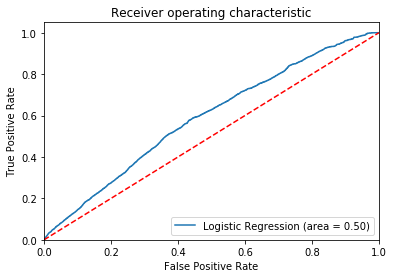

In [109]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [111]:
import numpy as np
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import brier_score_loss

   
X = dfTrain4[cols_keep2]
y = dfTrain4['churn']

# Now train our LR model using Leave-One-Out cross validation
lr = LogisticRegression()
y_pred = cross_val_predict(lr, X, y, cv=5, method='predict_proba')
y_positive_pred = [x[1] for x in y_pred]

auroc_lr = roc_auc_score(y, y_positive_pred)
brier_lr = brier_score_loss(y, y_positive_pred)

print ('AUROC score: ', auroc_lr)
print ('Brier score: ', brier_lr)

('AUROC score: ', 0.5840764623425725)
('Brier score: ', 0.0865831222333582)


In [113]:
print result.conf_int() 

                                     0             1
Flag_Miss                -4.637092e-01 -3.910884e-01
orig_ka                  -3.950367e-01 -3.067634e-01
margin_gross_pow_ele      7.479216e-03  8.676250e-03
chs_fo                    6.945506e-02  1.435642e-01
date_activ                6.034279e-06  8.373272e-06
chs_lm                   -3.486651e-01 -2.225694e-01
date_modif_prod           1.479797e-06  2.971274e-06
cons_12m                 -3.424901e-07 -2.395888e-07
cons_gas_12m             -1.656316e-06 -1.120731e-06
f                         4.245616e-03  1.347372e-01
net_margin                1.639258e-04  2.531670e-04
price_p2_var              1.501478e+00  2.224882e+00
nb_prod_act              -7.286952e-02 -5.585026e-03
date_renewal              6.172036e-06  1.645591e-05
price_p1_fix              1.066241e-02  1.721735e-02
forecast_price_energy_p1 -2.400496e+00 -9.367134e-01
price_date               -2.608804e-05 -1.561479e-05


In [144]:
print result.coef_

[[-1.95184302e-09 -1.70281939e-09  9.49399815e-08  1.56707711e-09
   1.40361939e-05 -6.81759602e-10  2.76426960e-06 -3.46434163e-07
  -1.33183029e-06  2.40455407e-10  8.34546589e-07  1.19470741e-10
  -6.21609224e-10 -7.09996061e-06  1.35402814e-09 -2.33483308e-11
  -9.77461390e-06]]


In [114]:
# odds ratios only
print np.exp(result.params)

Flag_Miss                   0.652203
orig_ka                     0.704054
margin_gross_pow_ele        1.008110
chs_fo                      1.112389
date_activ                  1.000007
chs_lm                      0.751550
date_modif_prod             1.000002
cons_12m                    1.000000
cons_gas_12m                0.999999
f                           1.071963
net_margin                  1.000209
price_p2_var                6.444198
nb_prod_act                 0.961532
date_renewal                1.000011
price_p1_fix                1.014037
forecast_price_energy_p1    0.188510
price_date                  0.999979
dtype: float64


In [115]:
print result.predict()

[0.0867513  0.08658625 0.08642148 ... 0.07419883 0.07405572 0.07391286]


In [116]:
dfTest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 32 columns):
id                          4024 non-null object
activity_new                1670 non-null object
campaign_disc_ele           0 non-null float64
channel_sales               2968 non-null object
cons_12m                    4024 non-null int64
cons_gas_12m                4024 non-null int64
cons_last_month             4024 non-null int64
date_activ                  4024 non-null object
date_end                    4024 non-null object
date_first_activ            877 non-null object
date_modif_prod             3979 non-null object
date_renewal                4020 non-null object
forecast_base_bill_ele      877 non-null float64
forecast_base_bill_year     877 non-null float64
forecast_bill_12m           877 non-null float64
forecast_cons               877 non-null float64
forecast_cons_12m           4024 non-null float64
forecast_cons_year          4024 non-null int64
forecast_discount

In [117]:
dfTestHist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48236 entries, 0 to 48235
Data columns (total 8 columns):
id              48236 non-null object
price_date      48236 non-null object
price_p1_var    47934 non-null float64
price_p2_var    47934 non-null float64
price_p3_var    47934 non-null float64
price_p1_fix    47934 non-null float64
price_p2_fix    47934 non-null float64
price_p3_fix    47934 non-null float64
dtypes: float64(6), object(2)
memory usage: 2.9+ MB


In [118]:
dfTestOutput.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 4 columns):
Unnamed: 0           4024 non-null int64
id                   4024 non-null object
Churn_prediction     0 non-null float64
Churn_probability    0 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 125.8+ KB


In [138]:
from sklearn.linear_model import LogisticRegression
m = LogisticRegression()
m.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [128]:
print(m.coef_)

[[-1.95184302e-09 -1.70281939e-09  9.49399815e-08  1.56707711e-09
   1.40361939e-05 -6.81759602e-10  2.76426960e-06 -3.46434163e-07
  -1.33183029e-06  2.40455407e-10  8.34546589e-07  1.19470741e-10
  -6.21609224e-10 -7.09996061e-06  1.35402814e-09 -2.33483308e-11
  -9.77461390e-06]]


In [134]:
m.fit(X / np.std(X, 0), y)
print(m.coef_)

[[-1.48926016e-09 -6.36971321e-10 -3.91968024e-10 -3.73635255e-10
  -7.65621113e-07 -4.02108493e-10 -5.18803557e-07 -3.24550569e-10
  -2.34871225e-10 -1.27369615e-09 -3.11110396e-10 -6.27316342e-10
  -6.57043818e-10 -4.48930325e-06 -5.15377332e-09 -3.35276154e-09
  -3.77765033e-05]]


In [140]:
print(m.fit(X,y))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


In [145]:
print result.coef_

[[-1.95184302e-09 -1.70281939e-09  9.49399815e-08  1.56707711e-09
   1.40361939e-05 -6.81759602e-10  2.76426960e-06 -3.46434163e-07
  -1.33183029e-06  2.40455407e-10  8.34546589e-07  1.19470741e-10
  -6.21609224e-10 -7.09996061e-06  1.35402814e-09 -2.33483308e-11
  -9.77461390e-06]]


In [146]:
y.value_counts()

0    169611
1     18137
Name: churn, dtype: int64

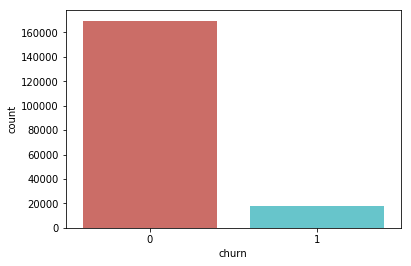

<Figure size 432x288 with 0 Axes>

In [148]:
import seaborn as sns
sns.countplot(x='churn',data=dfTrain4,palette='hls')
plt.show()
plt.savefig('count_plot')

In [149]:
y.mean()

0.09660289323987473

In [151]:
dfTrain4.groupby('churn')[cols_keep2].mean()

,Flag_Miss,orig_ka,margin_gross_pow_ele,chs_fo,date_activ,chs_lm,date_modif_prod,cons_12m,cons_gas_12m,f,net_margin,price_p2_var,nb_prod_act,date_renewal,price_p1_fix,forecast_price_energy_p1,price_date
churn,,,,,,,,,,,,,,,,,
0,0.796965,0.296691,21.802081,0.440974,2.010547e+07,0.136200,2.012434e+07,201914.22304,33619.581159,0.812064,214.080827,0.053971,1.359617,2.015111e+07,43.311851,0.135909,2.015065e+07
1,0.673320,0.173402,28.048331,0.569885,2.010953e+07,0.075205,2.012868e+07,89128.93290,9602.919557,0.854276,250.071607,0.058591,1.244197,2.015120e+07,43.441699,0.135705,2.015065e+07


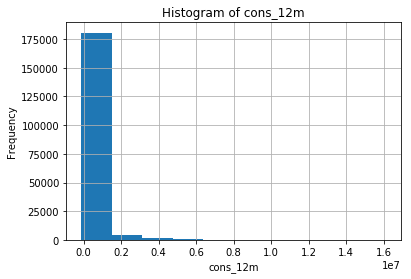

In [152]:
dfTrain4.cons_12m.hist()
plt.title('Histogram of cons_12m')
plt.xlabel('cons_12m')
plt.ylabel('Frequency')
plt.savefig('hist_cons_12m')

In [160]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [161]:
print(result.intercept_)
print(result.coef_)

[-4.85596513e-13]
[[-1.95184302e-09 -1.70281939e-09  9.49399815e-08  1.56707711e-09
   1.40361939e-05 -6.81759602e-10  2.76426960e-06 -3.46434163e-07
  -1.33183029e-06  2.40455407e-10  8.34546589e-07  1.19470741e-10
  -6.21609224e-10 -7.09996061e-06  1.35402814e-09 -2.33483308e-11
  -9.77461390e-06]]


In [163]:
from sklearn.cross_validation import cross_val_score
cross_val = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=10)
print cross_val
print cross_val.mean()

[0.9033873  0.90338216 0.90338216 0.90338216 0.90338216 0.90338216
 0.90338216 0.90343028 0.90343028 0.90343028]
0.9033971073423424


In [164]:
model = LogisticRegression()
model = model.fit (X,y)
pd.DataFrame(zip(X.columns, np.transpose(model.coef_)))

,0,1
0,Flag_Miss,[-1.951843019309009e-09]
1,orig_ka,[-1.7028193926446353e-09]
2,margin_gross_pow_ele,[9.493998153492228e-08]
3,chs_fo,[1.5670771093380457e-09]
4,date_activ,[1.4036193917030842e-05]
5,chs_lm,[-6.817596021222872e-10]
6,date_modif_prod,[2.7642695954054635e-06]
7,cons_12m,[-3.4643416270156136e-07]
8,cons_gas_12m,[-1.3318302921690081e-06]
9,f,[2.404554072067711e-10]


In [167]:
coeffs = result.coef_[0]

In [168]:
print('Coefficients Length', coeffs.size)
print('Positive Coefficients', (coeffs >= 0).sum())

('Coefficients Length', 17)
('Positive Coefficients', 8)


In [173]:
result.coef_[0]

array([-1.95184302e-09, -1.70281939e-09,  9.49399815e-08,  1.56707711e-09,
        1.40361939e-05, -6.81759602e-10,  2.76426960e-06, -3.46434163e-07,
       -1.33183029e-06,  2.40455407e-10,  8.34546589e-07,  1.19470741e-10,
       -6.21609224e-10, -7.09996061e-06,  1.35402814e-09, -2.33483308e-11,
       -9.77461390e-06])

In [174]:
z = result.coef_[0]

In [175]:
z

array([-1.95184302e-09, -1.70281939e-09,  9.49399815e-08,  1.56707711e-09,
        1.40361939e-05, -6.81759602e-10,  2.76426960e-06, -3.46434163e-07,
       -1.33183029e-06,  2.40455407e-10,  8.34546589e-07,  1.19470741e-10,
       -6.21609224e-10, -7.09996061e-06,  1.35402814e-09, -2.33483308e-11,
       -9.77461390e-06])

In [194]:
# X.values * z[:, None]

In [186]:
X *= z

In [195]:
# X.multiply(z, axis=0)

In [191]:
# Convert coefficient array to a dataframe
tt = pd.DataFrame(z, columns=['coef']) 

In [192]:
tt

,coef
0,-1.951843e-09
1,-1.702819e-09
2,9.493998e-08
3,1.567077e-09
4,1.403619e-05
5,-6.817596e-10
6,2.764270e-06
7,-3.464342e-07
8,-1.331830e-06
9,2.404554e-10


In [280]:
#X.multiply(z, axis=1)

In [196]:
model = LogisticRegression()
model.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [198]:
import pickle
#Save the model to disk
filename = 'final_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [199]:
y_pred = result.predict(X_test)

In [201]:
#Join dfTestHist with dfTest1 to Append pricing history 
dfTest2 = pd.merge(dfTest, dfTestHist, on='id', how='inner')
                                   
# Create a set of dummy variables from the sex variable
df_hasgas = pd.get_dummies(dfTest2['has_gas'])

# Join the dummy variables to the main dataframe
dfTest2 = pd.concat([dfTest2, df_hasgas], axis=1)                                    

# Convert date to numeric 
dfTest2['date_activ'] = pd.to_numeric(dfTest2.date_activ.str.replace('-',''))
dfTest2['date_end'] = pd.to_numeric(dfTest2.date_end.str.replace('-',''))
dfTest2['date_first_activ'] = pd.to_numeric(dfTest2.date_first_activ.str.replace('-',''))
dfTest2['date_modif_prod'] = pd.to_numeric(dfTest2.date_modif_prod.str.replace('-',''))
dfTest2['date_renewal'] = pd.to_numeric(dfTest2.date_renewal.str.replace('-',''))
dfTest2['price_date'] = pd.to_numeric(dfTest2.price_date.str.replace('-',''))

# Create a binary variable to indicate missing values
dfTest2['Flag_Miss'] = np.where(dfTest2['date_first_activ'] > 0, 0, 1)

# Drops numeric columns with large % of missing value
dfTest3 = dfTest2.drop(['campaign_disc_ele','date_first_activ','forecast_base_bill_ele','forecast_base_bill_year','forecast_bill_12m','forecast_cons','t'], axis=1)


# Create a set of dummy variables from the channel_sales variable
channel_sales = pd.get_dummies(dfTest3['channel_sales'],prefix='chs_', drop_first=True)

# Join the dummy variables to the main dataframe
dfTest3 = pd.concat([dfTest3, channel_sales], axis=1) 

# Create a set of dummy variables from the channel_sales variable
origin_up = pd.get_dummies(dfTest3['origin_up'],prefix='orig_', drop_first=True)

# Join the dummy variables to the main dataframe
dfTest3 = pd.concat([dfTest3, origin_up], axis=1) 

dfTest4 = dfTest3.drop(['activity_new','has_gas','origin_up','channel_sales'], axis=1)

# Rename the self-defined Churn coloumn name to churn_def 
dfTest4.rename(columns={'chs__ewpakwlliwisiwduibdlfmalxowmwpci': 'chs_ew'}, inplace=True)
dfTest4.rename(columns={'chs__fixdbufsefwooaasfcxdxadsiekoceaa': 'chs_fi'}, inplace=True)
dfTest4.rename(columns={'chs__foosdfpfkusacimwkcsosbicdxkicaua': 'chs_fo'}, inplace=True)
dfTest4.rename(columns={'chs__lmkebamcaaclubfxadlmueccxoimlema': 'chs_lm'}, inplace=True)
dfTest4.rename(columns={'chs__sddiedcslfslkckwlfkdpoeeailfpeds': 'chs_sd'}, inplace=True)
dfTest4.rename(columns={'chs__usilxuppasemubllopkaafesmlibmsdf': 'chs_uf'}, inplace=True)

dfTest4.rename(columns={'orig__kamkkxfxxuwbdslkwifmmcsiusiuosws': 'orig_ka'}, inplace=True)
dfTest4.rename(columns={'orig__ldkssxwpmemidmecebumciepifcamkci': 'orig_ld'}, inplace=True)
dfTest4.rename(columns={'orig__lxidpiddsbxsbosboudacockeimpuepw': 'orig_lx'}, inplace=True)
dfTest4.rename(columns={'orig__usapbepcfoloekilkwsdiboslwaxobdp': 'orig_us'}, inplace=True)

cols_keep2 = [
'Flag_Miss',
'orig_ka',
'margin_gross_pow_ele',
'chs_fo',
'date_activ',
'chs_lm',
'date_modif_prod',
'cons_12m',
'cons_gas_12m',
'f',
'net_margin',
'price_p2_var',
'nb_prod_act',
'date_renewal',
'price_p1_fix',
'forecast_price_energy_p1',
'price_date']

dfTest5 = dfTest4[cols_keep2]
dfTest5 = dfTest5.dropna()
dfTest5.info()

X_test = dfTest5[cols_keep2]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47049 entries, 0 to 48235
Data columns (total 17 columns):
Flag_Miss                   47049 non-null int64
orig_ka                     47049 non-null uint8
margin_gross_pow_ele        47049 non-null float64
chs_fo                      47049 non-null uint8
date_activ                  47049 non-null int64
chs_lm                      47049 non-null uint8
date_modif_prod             47049 non-null float64
cons_12m                    47049 non-null int64
cons_gas_12m                47049 non-null int64
f                           47049 non-null uint8
net_margin                  47049 non-null float64
price_p2_var                47049 non-null float64
nb_prod_act                 47049 non-null int64
date_renewal                47049 non-null float64
price_p1_fix                47049 non-null float64
forecast_price_energy_p1    47049 non-null float64
price_date                  47049 non-null int64
dtypes: float64(7), int64(6), uint8(4)
memor

In [239]:
#dfTest4['date_end'].value_counts()

In [211]:
# Complete the call to convert the date column
#dfTest4['date_end1'] =  pd.to_datetime(dfTest4['date_end'],format='%Y-%m-%d')
                              
#d_jun = pd.to_datetime('2016-12-30')
dfTest4['churn'] = np.where(dfTest4['date_end'] >= 20160601, 0, 1)
dfTest4['churn'].mean()

0.3269135085828012

In [212]:
dfTest4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48236 entries, 0 to 48235
Data columns (total 42 columns):
id                          48236 non-null object
cons_12m                    48236 non-null int64
cons_gas_12m                48236 non-null int64
cons_last_month             48236 non-null int64
date_activ                  48236 non-null int64
date_end                    48236 non-null int64
date_modif_prod             47697 non-null float64
date_renewal                48188 non-null float64
forecast_cons_12m           48236 non-null float64
forecast_cons_year          48236 non-null int64
forecast_discount_energy    47948 non-null float64
forecast_meter_rent_12m     48236 non-null float64
forecast_price_energy_p1    47948 non-null float64
forecast_price_energy_p2    47948 non-null float64
forecast_price_pow_p1       47948 non-null float64
imp_cons                    48236 non-null float64
margin_gross_pow_ele        48212 non-null float64
margin_net_pow_ele          48212 non

In [217]:
import statsmodels.api as sm       #for statistical modeling
#logit = sm.logit(y,X)

model = LogisticRegression()
model.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [218]:
result = model.fit(X,y)

In [220]:
X = dfTrain4[cols_keep2]
y = dfTrain4['churn']

import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.305067
         Iterations 8
                             Results: Logit
Model:                 Logit              Pseudo R-squared:   0.039      
Dependent Variable:    churn              AIC:                114585.4018
Date:                  2018-11-18 20:11   BIC:                114757.8304
No. Observations:      187748             Log-Likelihood:     -57276.    
Df Model:              16                 LL-Null:            -59620.    
Df Residuals:          187731             LLR p-value:        0.0000     
Converged:             1.0000             Scale:              1.0000     
No. Iterations:        8.0000                                            
-------------------------------------------------------------------------
                          Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------------
Flag_Miss                -0.4274   0.018

In [222]:
dfTest5['intercept'] = 1.0

In [223]:
dfTest5['phat'] = result.predict(dfTest5[cols_keep2])

In [224]:
dfTest5['phat'].head(50)

0     0.119544
1     0.119324
2     0.119106
3     0.118322
4     0.118104
5     0.117887
6     0.117671
7     0.116652
8     0.116548
9     0.116107
10    0.115893
11    0.115680
12    0.080991
13    0.080836
14    0.080681
15    0.080526
16    0.080372
17    0.080218
18    0.080065
19    0.079911
20    0.079758
21    0.079605
22    0.079452
23    0.079300
24    0.108935
25    0.108733
26    0.108531
27    0.108330
28    0.108128
29    0.107927
30    0.107727
31    0.106783
32    0.106279
33    0.106212
34    0.106014
35    0.105817
36    0.116684
37    0.116871
38    0.116656
39    0.116441
40    0.116227
41    0.116013
42    0.115799
43    0.115442
44    0.115230
45    0.115017
46    0.114805
47    0.114593
48    0.086749
49    0.086584
Name: phat, dtype: float64

In [228]:
print dfTest5['phat'].min()

0.000753455959717098


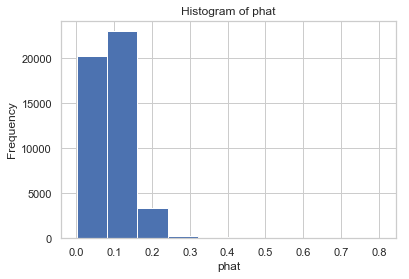

In [229]:
dfTest5['phat'].hist()
pl.title('Histogram of phat')
pl.xlabel('phat')
pl.ylabel('Frequency')
pl.show()

In [231]:
print dfTest5['phat'].describe()

count    47049.000000
mean         0.096389
std          0.047875
min          0.000753
25%          0.063587
50%          0.089004
75%          0.120598
max          0.805655
Name: phat, dtype: float64


In [234]:
#convert probabilities to 'yes' 'no'
dfTest5['churn_prediction']= np.where(dfTest5['phat'] > 0.2,1.00,0.00)
print dfTest5['churn_prediction'].value_counts()

0.0    45788
1.0     1261
Name: churn_prediction, dtype: int64


In [235]:
dfTest5.rename(columns={'phat': 'churn_probability'}, inplace=True)

In [245]:
cols_keep3 = [
    'id',
'Flag_Miss',
'orig_ka',
'margin_gross_pow_ele',
'chs_fo',
'date_activ',
'chs_lm',
'date_modif_prod',
'cons_12m',
'cons_gas_12m',
'f',
'net_margin',
'price_p2_var',
'nb_prod_act',
'date_renewal',
'price_p1_fix',
'forecast_price_energy_p1',
'price_date']

dfTest6 = dfTest4[cols_keep3]
dfTest6 = dfTest4.dropna()

In [242]:
cols_to_keep = ['churn_prediction','churn_probability']
dfTest_Outcome = dfTest5[cols_to_keep]

In [246]:
cols_id = ['id']
dfTestid = dfTest6[cols_id]

In [247]:
dfTest_OutFile = pd.concat([dfTestid, dfTest_Outcome])

/Users/meichen/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [248]:
dfTest_OutFile.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94098 entries, 0 to 48235
Data columns (total 3 columns):
churn_prediction     47049 non-null float64
churn_probability    47049 non-null float64
id                   47049 non-null object
dtypes: float64(2), object(1)
memory usage: 2.9+ MB


In [249]:
dfTest_OutFile.head()

,churn_prediction,churn_probability,id
0,NaN,NaN,ed18c9981ce183ef347246cdcc55f743
1,NaN,NaN,ed18c9981ce183ef347246cdcc55f743
2,NaN,NaN,ed18c9981ce183ef347246cdcc55f743
3,NaN,NaN,ed18c9981ce183ef347246cdcc55f743
4,NaN,NaN,ed18c9981ce183ef347246cdcc55f743


In [252]:
export_csv=dfTest_OutFile.to_csv('BCG_Output.csv', sep='\t', header=True)

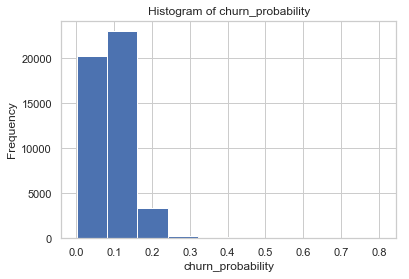

In [298]:
dfTest_OutFile['churn_probability'].hist()
pl.title('Histogram of churn_probability')
pl.xlabel('churn_probability')
pl.ylabel('Frequency')
pl.show()

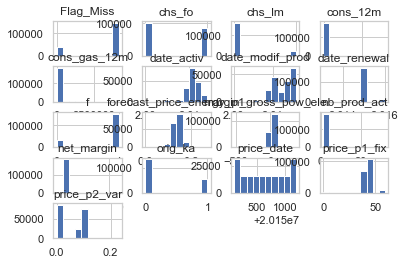

In [253]:
X.hist()
pl.show()

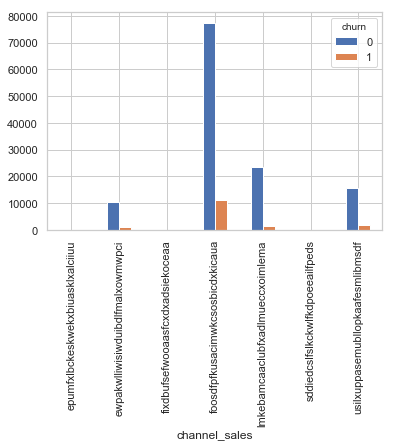

In [258]:
%matplotlib inline
pd.crosstab(dfTrain2['channel_sales'],dfTrain2['churn']).plot(kind='bar')

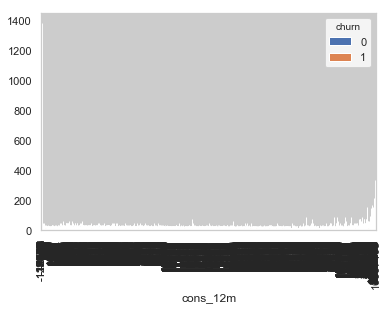

In [259]:
pd.crosstab(dfTrain2['cons_12m'],dfTrain2['churn']).plot(kind='bar')

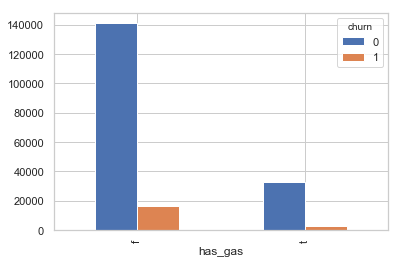

In [260]:
pd.crosstab(dfTrain2['has_gas'],dfTrain2['churn']).plot(kind='bar')


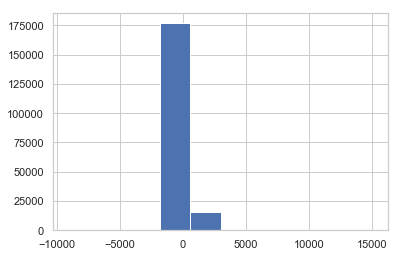

In [261]:
dfTrain2['imp_cons'].hist()

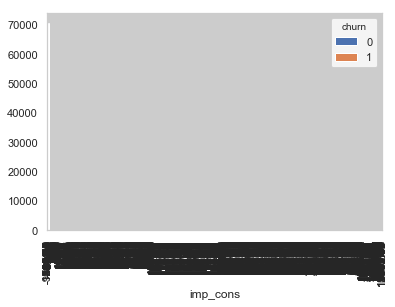

In [262]:
pd.crosstab(dfTrain2['imp_cons'],dfTrain2['churn']).plot(kind='bar')

In [264]:
price_cols =['price_p1_var',
'price_p2_var',
'price_p3_var',
'price_p1_fix',
'price_p2_fix',
'price_p3_fix']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c6d64b250>,
      dtype=object)

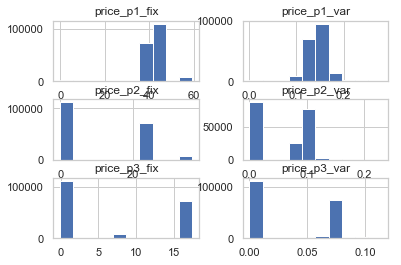

In [265]:
dfTrain2[price_cols].hist()

<function matplotlib.pyplot.show>

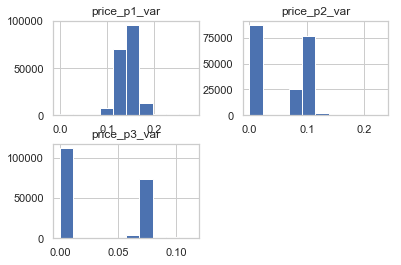

In [279]:
dfTrain2[['price_p1_var','price_p2_var','price_p3_var']].hist()
pl.show

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c6777c890>,
      dtype=object)

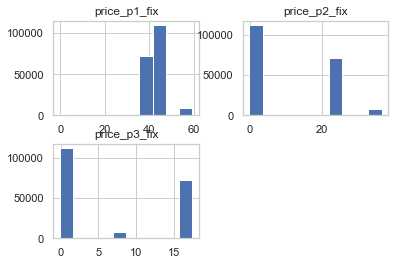

In [273]:
dfTrain2[['price_p1_fix','price_p2_fix','price_p3_fix']].hist()

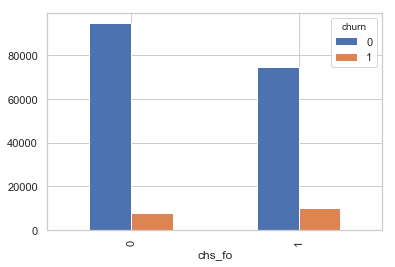

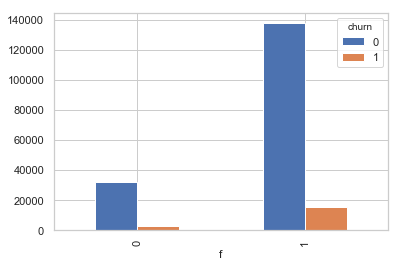

In [287]:
pd.crosstab(dfTrain4['chs_fo'],dfTrain4['churn']).plot(kind='bar')
pd.crosstab(dfTrain4['f'],dfTrain4['churn']).plot(kind='bar')

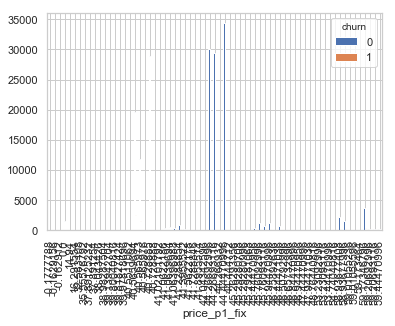

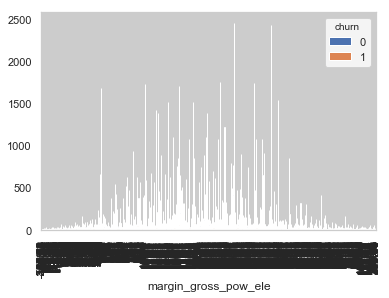

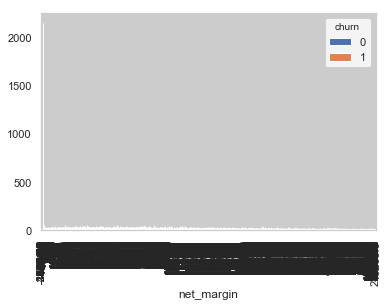

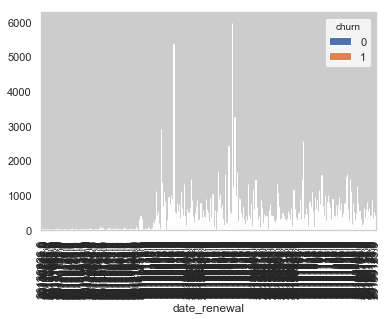

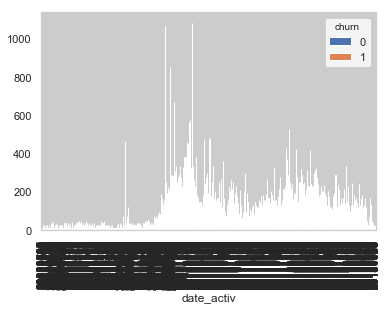

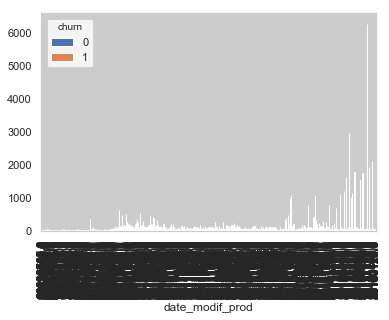

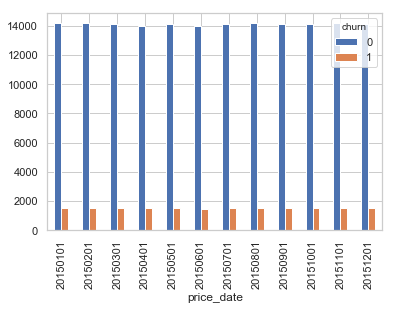

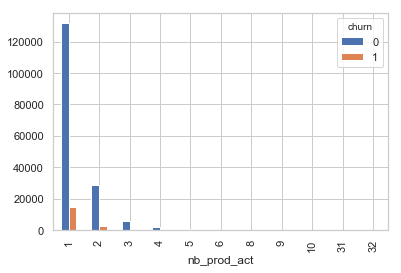

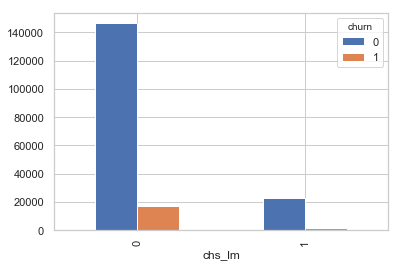

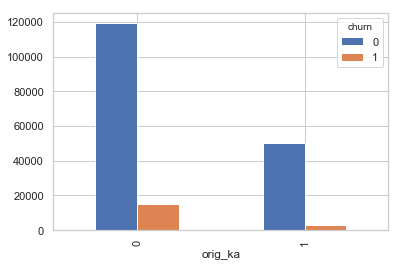

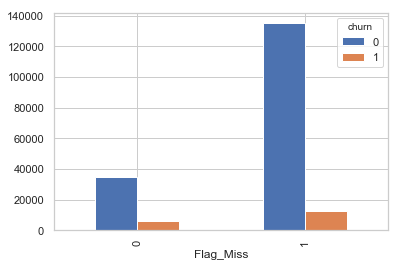

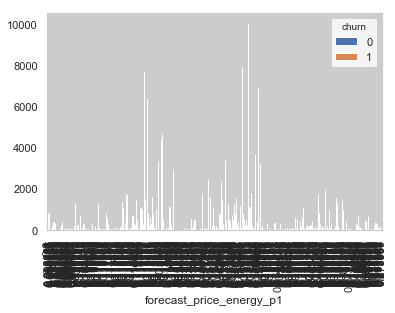

In [288]:
pd.crosstab(dfTrain4['price_p1_fix'],dfTrain4['churn']).plot(kind='bar')
pd.crosstab(dfTrain4['margin_gross_pow_ele'],dfTrain4['churn']).plot(kind='bar')
pd.crosstab(dfTrain4['net_margin'],dfTrain4['churn']).plot(kind='bar')
pd.crosstab(dfTrain4['date_renewal'],dfTrain4['churn']).plot(kind='bar')
pd.crosstab(dfTrain4['date_activ'],dfTrain4['churn']).plot(kind='bar')
pd.crosstab(dfTrain4['date_modif_prod'],dfTrain4['churn']).plot(kind='bar')
pd.crosstab(dfTrain4['price_date'],dfTrain4['churn']).plot(kind='bar')
pd.crosstab(dfTrain4['nb_prod_act'],dfTrain4['churn']).plot(kind='bar')
pd.crosstab(dfTrain4['chs_lm'],dfTrain4['churn']).plot(kind='bar')
pd.crosstab(dfTrain4['orig_ka'],dfTrain4['churn']).plot(kind='bar')
pd.crosstab(dfTrain4['Flag_Miss'],dfTrain4['churn']).plot(kind='bar')
pd.crosstab(dfTrain4['forecast_price_energy_p1'],dfTrain4['churn']).plot(kind='bar')

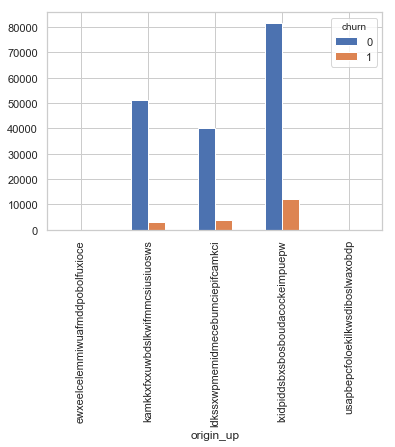

In [292]:
pd.crosstab(dfTrain3['origin_up'],dfTrain3['churn']).plot(kind='bar')

In [300]:
dfTrain4.groupby('churn')[['price_p1_var','price_p2_var','price_p3_var']].mean()

,price_p1_var,price_p2_var,price_p3_var
churn,,,
0,0.140967,0.053971,0.030237
1,0.141110,0.058591,0.035353


In [301]:
dfTrain4.groupby('churn')[['price_p1_fix','price_p2_fix','price_p3_fix']].mean()

,price_p1_fix,price_p2_fix,price_p3_fix
churn,,,
0,43.311851,10.545491,6.351846
1,43.441699,12.172224,7.474158


In [302]:
dfTrain4.groupby('churn')[['cons_12m','cons_gas_12m','cons_last_month']].mean()

,cons_12m,cons_gas_12m,cons_last_month
churn,,,
0,201914.22304,33619.581159,20431.665269
1,89128.93290,9602.919557,8051.806252
